# Importing dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [3]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/cardekho.csv')

In [4]:
#inspecting the first five rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
#checking the number of rows and columns
car_dataset.shape

(8128, 12)

In [6]:
#getting the information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:

#checking the number of missing values
car_dataset.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


# Encoding the Categorical data

In [50]:
#encoding "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)
#encoding "seller_type" column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
#encoding "Transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
#encoding "owner" column
car_dataset.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)

In [51]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,1,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,3,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,1,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,1,16.10,1298.0,88.2,5.0


# Splitting the data and target

In [52]:
X=car_dataset.drop(['name','selling_price','mileage(km/ltr/kg)','engine','max_power','seats'],axis=1)
Y=car_dataset['selling_price']

In [53]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2014     145500     1            1             0      1
1     2014     120000     1            1             0      2
2     2006     140000     0            1             0      3
3     2010     127000     1            1             0      1
4     2007     120000     0            1             0      1
...    ...        ...   ...          ...           ...    ...
8123  2013     110000     0            1             0      1
8124  2007     119000     1            1             0      4
8125  2009     120000     1            1             0      1
8126  2013      25000     1            1             0      1
8127  2013      25000     1            1             0      1

[8128 rows x 6 columns]


In [54]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


# Splitting the data into Training data and Test Data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

# Model Training


1. Linear Regression

In [56]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [57]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

 Model Evaluation

In [58]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [60]:
#R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.48505045133619473


 Visualize the actual price and predicted prices

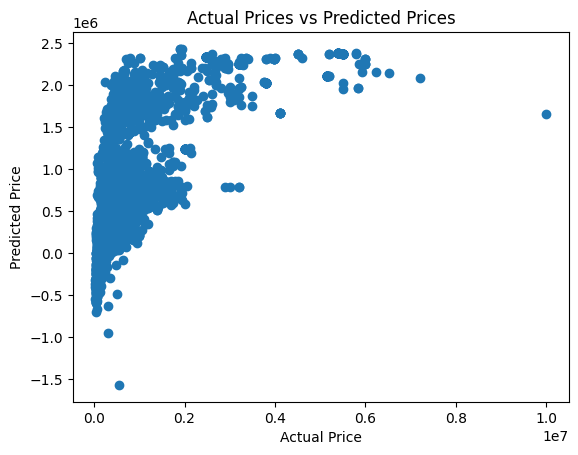

In [61]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [62]:
#prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [63]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.49358246735040157


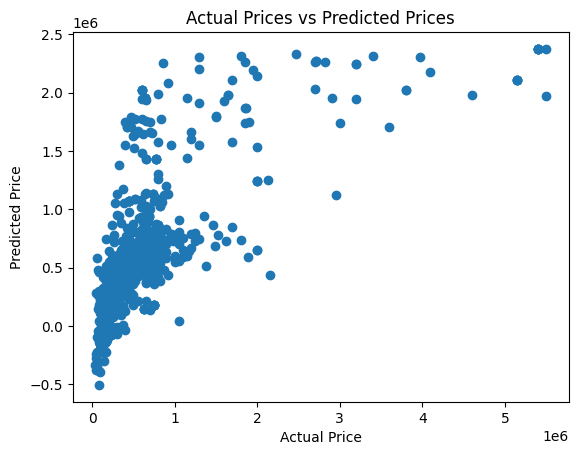

In [64]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [67]:
#loading the lasso regression model
lass_reg_model = Lasso()

In [68]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [69]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [71]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.4850504513060435


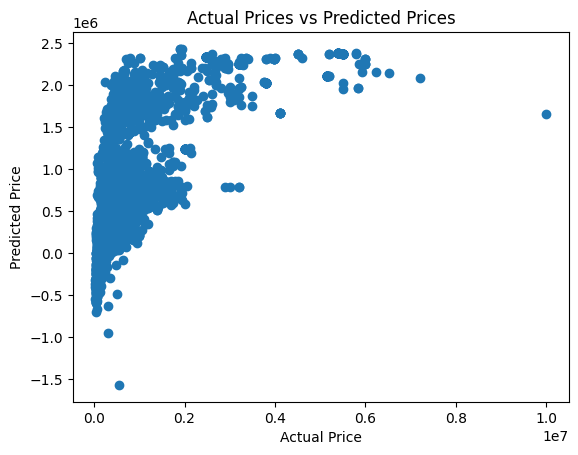

In [72]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [73]:
#prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [74]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.49358242421181586


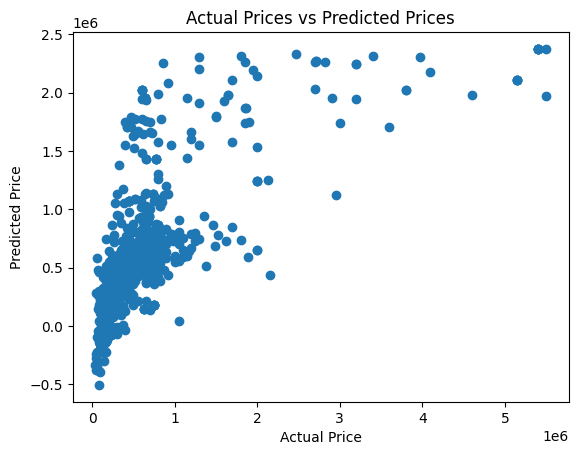

In [75]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()